# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import pandas_profiling as pp

In [2]:
pd.set_option('display.max_columns', None)

## Matplotlib

In [3]:
matplotlib.__version__

'3.4.3'

In [4]:
#ensures the charts are displayed without the need to "call" them
%matplotlib inline

# Importing Data

In [5]:
path = r'/Users/docopeland/Documents/data analysis/career foundry/06 Open Data'
wdi = pd.read_pickle(os.path.join(path,'data','prepared data','WDI_clean.pkl'))

# Data Cleaning

In [6]:
wdi.head()

Indicator Name,Country Name,level_1,Access to electricity (% of population),Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+),"Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)","Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)",Adequacy of social insurance programs (% of total welfare of beneficiary households),Adequacy of social protection and labor programs (% of total welfare of beneficiary households),Adequacy of social safety net programs (% of total welfare of beneficiary households),Agricultural land (% of land area),Armed forces personnel (% of total labor force),Arms exports (SIPRI trend indicator values),Arms imports (SIPRI trend indicator values),"Average working hours of children, working only, ages 7-14 (hours per week)","Average working hours of children, working only, female, ages 7-14 (hours per week)","Average working hours of children, working only, male, ages 7-14 (hours per week)",Bank capital to assets ratio (%),Bank liquid reserves to bank assets ratio (%),"Birth rate, crude (per 1,000 people)",Bribery incidence (% of firms experiencing at least one bribe payment request),CPIA building human resources rating (1=low to 6=high),CPIA business regulatory environment rating (1=low to 6=high),CPIA debt policy rating (1=low to 6=high),CPIA economic management cluster average (1=low to 6=high),CPIA efficiency of revenue mobilization rating (1=low to 6=high),CPIA equity of public resource use rating (1=low to 6=high),CPIA financial sector rating (1=low to 6=high),CPIA fiscal policy rating (1=low to 6=high),CPIA gender equality rating (1=low to 6=high),CPIA macroeconomic management rating (1=low to 6=high),CPIA policies for social inclusion/equity cluster average (1=low to 6=high),CPIA public sector management and institutions cluster average (1=low to 6=high),CPIA quality of budgetary and financial management rating (1=low to 6=high),CPIA quality of public administration rating (1=low to 6=high),CPIA social protection rating (1=low to 6=high),CPIA structural policies cluster average (1=low to 6=high),CPIA trade rating (1=low to 6=high),"Central government debt, total (% of GDP)","Children in employment, female (% of female children ages 7-14)","Children in employment, male (% of male children ages 7-14)","Children in employment, total (% of children ages 7-14)","Commercial bank branches (per 100,000 adults)","Contraceptive prevalence, any method (% of married women ages 15-49)","Contraceptive prevalence, any modern method (% of married women ages 15-49)","Contributing family workers, female (% of female employment) (modeled ILO estimate)","Contributing family workers, male (% of male employment) (modeled ILO estimate)",Current account balance (% of GDP),"Current education expenditure, total (% of total expenditure in public institutions)",Current health expenditure (% of GDP),"Death rate, crude (per 1,000 people)",Domestic credit to private sector (% of GDP),Domestic credit to private sector by banks (% of GDP),"Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)","Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)","Employers, female (% of female employment) (modeled ILO estimate)","Employers, male (% of male employment) (modeled ILO estimate)","Employers, total (% of total employment) (modeled ILO estimate)",Employment in agriculture (% of total employment) (modeled ILO estimate),"Employment to population ratio, 15+, female (%) (modeled ILO estimate)","Employment to population ratio, 15+, male (%) (modeled ILO estimate)","Employment to population ratio, 15+, total (%) (modeled ILO estimate)",Female genital mutilation prevalence

In [7]:
wdi.shape

(13406, 202)

In [8]:
#creating a list of columns that will be dropped
drop = ['Access to electricity (% of population)',
        'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
        'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
        'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
        'Adequacy of social insurance programs (% of total welfare of beneficiary households)',
        'Adequacy of social protection and labor programs (% of total welfare of beneficiary households)',
        'Adequacy of social safety net programs (% of total welfare of beneficiary households)',
        'Agricultural land (% of land area)',
        'Armed forces personnel (% of total labor force)',
        'Arms exports (SIPRI trend indicator values)',
        'Arms imports (SIPRI trend indicator values)',
        'Average working hours of children, working only, ages 7-14 (hours per week)',
        'Average working hours of children, working only, female, ages 7-14 (hours per week)',
        'Average working hours of children, working only, male, ages 7-14 (hours per week)',
        'Bank capital to assets ratio (%)',
        'Bank liquid reserves to bank assets ratio (%)',
        'Birth rate, crude (per 1,000 people)',
        'Bribery incidence (% of firms experiencing at least one bribe payment request)',
        'CPIA business regulatory environment rating (1=low to 6=high)',
        'CPIA debt policy rating (1=low to 6=high)',
        'CPIA economic management cluster average (1=low to 6=high)',
        'CPIA efficiency of revenue mobilization rating (1=low to 6=high)',
        'CPIA equity of public resource use rating (1=low to 6=high)',
        'CPIA financial sector rating (1=low to 6=high)',
        'CPIA fiscal policy rating (1=low to 6=high)',
        'CPIA macroeconomic management rating (1=low to 6=high)',
        'CPIA policies for social inclusion/equity cluster average (1=low to 6=high)',
        'CPIA public sector management and institutions cluster average (1=low to 6=high)',
        'CPIA quality of budgetary and financial management rating (1=low to 6=high)',
        'CPIA quality of public administration rating (1=low to 6=high)',
        'CPIA structural policies cluster average (1=low to 6=high)',
        'CPIA trade rating (1=low to 6=high)',
        'Central government debt, total (% of GDP)',
        'Children in employment, female (% of female children ages 7-14)',
        'Children in employment, male (% of male children ages 7-14)',
        'Children in employment, total (% of children ages 7-14)',
        'Commercial bank branches (per 100,000 adults)',
        'Contraceptive prevalence, any method (% of married women ages 15-49)',
        'Contraceptive prevalence, any modern method (% of married women ages 15-49)',
        'Contributing family workers, female (% of female employment) (modeled ILO estimate)',
        'Contributing family workers, male (% of male employment) (modeled ILO estimate)',
        'Current account balance (% of GDP)',
        'Current education expenditure, total (% of total expenditure in public institutions)',
        'Current health expenditure (% of GDP)',
        'Death rate, crude (per 1,000 people)',
        'Domestic credit to private sector (% of GDP)',
        'Domestic credit to private sector by banks (% of GDP)',
        'Educational attainment, at least completed primary, population 25+ years, female (%) (cumulative)',
        'Educational attainment, at least completed primary, population 25+ years, male (%) (cumulative)',
        'Educational attainment, at least completed primary, population 25+ years, total (%) (cumulative)',
        'Employers, male (% of male employment) (modeled ILO estimate)',
        'Employers, total (% of total employment) (modeled ILO estimate)',
        'Employment in agriculture (% of total employment) (modeled ILO estimate)',
        'Employment to population ratio, 15+, female (%) (modeled ILO estimate)',
        'Employment to population ratio, 15+, male (%) (modeled ILO estimate)',
        'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
        'Female genital mutilation prevalence (%)',
        'Female headed households (% of households with a female head)',
        'Final consumption expenditure (% of GDP)',
        'Firms using banks to finance investment (% of firms)',
        'Firms using banks to finance working capital (% of firms)',
        'Firms with female participation in ownership (% of firms)',
        'Firms with female top manager (% of firms)',
        'Fixed broadband subscriptions (per 100 people)',
        'Fixed telephone subscriptions (per 100 people)',
        'GDP (current US$)',
        'GDP growth (annual %)',
        'GDP per capita (current US$)',
        'GDP per capita growth (annual %)',
        'GDP per person employed (constant 2017 PPP $)',
        'Government expenditure on education, total (% of GDP)',
        'Government expenditure per student, primary (% of GDP per capita)',
        'Government expenditure per student, secondary (% of GDP per capita)',
        'Government expenditure per student, tertiary (% of GDP per capita)',
        'Gross domestic savings (% of GDP)',
        'Gross national expenditure (% of GDP)',
        'Gross savings (% of GDP)',
        'Households and NPISHs final consumption expenditure (% of GDP)',
        'Income share held by lowest 10%',
        'Income share held by lowest 20%',
        'Individuals using the Internet (% of population)',
        'Inflation, consumer prices (annual %)',
        'Intentional homicides (per 100,000 people)',
        'Intentional homicides, male (per 100,000 male)',
        'Labor force participation rate, male (% of male population ages 15+) (modeled ILO estimate)',
        'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
        'Labor force with advanced education (% of total working-age population with advanced education)',
        'Labor force with advanced education, female (% of female working-age population with advanced education)',
        'Labor force with advanced education, male (% of male working-age population with advanced education)',
        'Labor force with basic education (% of total working-age population with basic education)',
        'Labor force with basic education, female (% of female working-age population with basic education)',
        'Labor force with basic education, male (% of male working-age population with basic education)',
        'Labor force with intermediate education (% of total working-age population with intermediate education)',
        'Labor force with intermediate education, female (% of female working-age population with intermediate education)',
        'Labor force with intermediate education, male (% of male working-age population with intermediate education)',
        'Labor force, female (% of total labor force)',
        'Life expectancy at birth, female (years)',
        'Life expectancy at birth, male (years)',
        'Life expectancy at birth, total (years)',
        'Lifetime risk of maternal death (%)',
        'Literacy rate, adult male (% of males ages 15 and above)',
        'Literacy rate, adult total (% of people ages 15 and above)',
        'Literacy rate, youth female (% of females ages 15-24)',
        'Literacy rate, youth male (% of males ages 15-24)',
        'Literacy rate, youth total (% of people ages 15-24)',
        'Maternal mortality ratio (modeled estimate, per 100,000 live births)',
        'Military expenditure (% of GDP)',
        'Military expenditure (% of general government expenditure)',
        'Multidimensional poverty headcount ratio (% of total population)',
        'Multidimensional poverty headcount ratio, children (% of population ages 0-17)',
        'Multidimensional poverty headcount ratio, female (% of female population)',
        'Multidimensional poverty headcount ratio, household (% of total households)',
        'Multidimensional poverty headcount ratio, male (% of male population)',
        'Multidimensional poverty index (scale 0-1)',
        'Over-age students, primary (% of enrollment)',
        'Over-age students, primary, female (% of female enrollment)',
        'Over-age students, primary, male (% of male enrollment)',
        'People practicing open defecation (% of population)',
        'People using at least basic drinking water services (% of population)',
        'People using at least basic sanitation services (% of population)',
        'People using safely managed drinking water services (% of population)',
        'People using safely managed sanitation services (% of population)',
        'People with basic handwashing facilities including soap and water (% of population)',
        'Persistence to grade 5, female (% of cohort)',
        'Persistence to grade 5, male (% of cohort)',
        'Persistence to grade 5, total (% of cohort)',
        'Persistence to last grade of primary, female (% of cohort)',
        'Persistence to last grade of primary, male (% of cohort)',
        'Persistence to last grade of primary, total (% of cohort)',
        'Population, female (% of total population)',
        'Population, male (% of total population)',
        'Poverty gap at $1.90 a day (2011 PPP) (%)',
        'Poverty gap at $3.20 a day (2011 PPP) (%)',
        'Poverty headcount ratio at $1.90 a day (2011 PPP) (% of population)',
        'Poverty headcount ratio at $3.20 a day (2011 PPP) (% of population)',
        'Poverty headcount ratio at $5.50 a day (2011 PPP) (% of population)',
        'Poverty headcount ratio at national poverty lines (% of population)',
        'Power outages in firms in a typical month (number)',
        'Pregnant women receiving prenatal care (%)',
        'Prevalence of moderate or severe food insecurity in the population (%)',
        'Prevalence of severe food insecurity in the population (%)',
        'Prevalence of undernourishment (% of population)',
        'Primary completion rate, female (% of relevant age group)',
        'Primary completion rate, male (% of relevant age group)',
        'Primary school starting age (years)',
        'Proportion of population pushed below the $1.90 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure (%)',
        'Proportion of population pushed below the $3.20 ($ 2011 PPP) poverty line by out-of-pocket health care expenditure (%)',
        'Proportion of population spending more than 10% of household consumption or income on out-of-pocket health care expenditure (%)',
        'Proportion of population spending more than 25% of household consumption or income on out-of-pocket health care expenditure (%)',
        'Proportion of time spent on unpaid domestic and care work, male (% of 24 hour day)',
        'Proportion of women subjected to physical and/or sexual violence in the last 12 months (% of ever-partnered women ages 15-49)',
        'Ratio of female to male labor force participation rate (%) (modeled ILO estimate)',
        'Renewable electricity output (% of total electricity output)',
        'Renewable energy consumption (% of total final energy consumption)',
        'Rural population (% of total population)',
        'School enrollment, primary (% net)',
        'School enrollment, primary, male (% net)',
        'School enrollment, secondary, female (% net)',
        'School enrollment, secondary, male (% gross)',
        'School enrollment, tertiary, female (% gross)',
        'School enrollment, tertiary, male (% gross)',
        'Secondary education, general pupils (% female)',
        'Secondary education, pupils (% female)',
        'Services, value added (% of GDP)',
        'Strength of legal rights index (0=weak to 12=strong)',
        'Tax revenue (% of GDP)',
        'Trade (% of GDP)',
        'Unemployment, female (% of female labor force) (modeled ILO estimate)',
        'Unemployment, male (% of male labor force) (modeled ILO estimate)',
        'Unemployment, total (% of total labor force) (modeled ILO estimate)',
        'Vulnerable employment, female (% of female employment) (modeled ILO estimate)',
        'Vulnerable employment, male (% of male employment) (modeled ILO estimate)',
        'Vulnerable employment, total (% of total employment) (modeled ILO estimate)',
        'Wage and salaried workers, female (% of female employment) (modeled ILO estimate)',
        'Wage and salaried workers, male (% of male employment) (modeled ILO estimate)',
        'Wage and salaried workers, total (% of total employment) (modeled ILO estimate)',
        'Women participating in the three decisions (own health care, major household purchases, and visiting family) (% of women age 15-49)',
        'Women who believe a husband is justified in beating his wife (any of five reasons) (%)',
        'Women who believe a husband is justified in beating his wife when she argues with him (%)',
        'Women who believe a husband is justified in beating his wife when she burns the food (%)',
        'Women who believe a husband is justified in beating his wife when she goes out without telling him (%)',
        'Women who believe a husband is justified in beating his wife when she neglects the children (%)',
        'Women who believe a husband is justified in beating his wife when she refuses sex with him (%)',
        'Women who were first married by age 15 (% of women ages 20-24)']

In [9]:
#drop all the columns that I don't need
wdi = wdi.drop(columns = drop)

In [10]:
wdi.columns

Index(['Country Name', 'level_1',
       'CPIA building human resources rating (1=low to 6=high)',
       'CPIA gender equality rating (1=low to 6=high)',
       'CPIA social protection rating (1=low to 6=high)',
       'Employers, female (% of female employment) (modeled ILO estimate)',
       'Female share of employment in senior and middle management (%)',
       'Fertility rate, total (births per woman)',
       'Intentional homicides, female (per 100,000 female)',
       'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)',
       'Literacy rate, adult female (% of females ages 15 and above)',
       'Poverty gap at $5.50 a day (2011 PPP) (%)',
       'Proportion of seats held by women in national parliaments (%)',
       'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)',
       'School enrollment, primary (gross), gender parity index (GPI)',
       'School enrollment, primary, female (% net)',
     

In [11]:
#renaming columns as they have super long names
wdi.rename(columns = {'level_1':'year',
        'CPIA building human resources rating (1=low to 6=high)':'CPI human resources',
        'CPIA gender equality rating (1=low to 6=high)':'CPIA gender equality',
        'CPIA social protection rating (1=low to 6=high)':'CPIA social protection',
        'Employers, female (% of female employment) (modeled ILO estimate)':'employers',
        'Female share of employment in senior and middle management (%)':'management',
        'Fertility rate, total (births per woman)':'fertility rate',
        'Intentional homicides, female (per 100,000 female)':'intentional homicides',
        'Labor force participation rate, female (% of female population ages 15+) (modeled ILO estimate)':'labor force',
        'Literacy rate, adult female (% of females ages 15 and above)':'literacy rate',
        'Poverty gap at $5.50 a day (2011 PPP) (%)':'poverty gap',
        'Proportion of seats held by women in national parliaments (%)':'parliment seats',
        'Proportion of time spent on unpaid domestic and care work, female (% of 24 hour day)':'unpaid domestic',
        'School enrollment, primary (gross), gender parity index (GPI)':'gender parity index',
        'School enrollment, primary, female (% net)':'primary enrollment',
        'Teenage mothers (% of women ages 15-19 who have had children or are currently pregnant)':'teenage mothers',
        'Women who were first married by age 18 (% of women ages 20-24)':'married by 18'},inplace = True)

In [12]:
#the number of non-null values per column
wdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13406 entries, 0 to 13405
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country Name            13406 non-null  object 
 1   year                    13406 non-null  object 
 2   CPI human resources     1217 non-null   float64
 3   CPIA gender equality    1217 non-null   float64
 4   CPIA social protection  1209 non-null   float64
 5   employers               5423 non-null   float64
 6   management              1015 non-null   float64
 7   fertility rate          11948 non-null  float64
 8   intentional homicides   2076 non-null   float64
 9   labor force             5984 non-null   float64
 10  literacy rate           960 non-null    float64
 11  poverty gap             1815 non-null   float64
 12  parliment seats         4519 non-null   float64
 13  unpaid domestic         177 non-null    float64
 14  gender parity index     7239 non-null 

In [13]:
wdi['year'] = wdi['year'].astype(np.float64)

In [14]:
wdi = wdi[wdi['year'] > 1989]

In [42]:
wdi.describe()

Indicator Name,year,CPI human resources,CPIA gender equality,CPIA social protection,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
count,6939.000000,1217.000000,1217.000000,1209.000000,5423.000000,1015.000000,6184.000000,2076.000000,5984.000000,848.000000,1711.000000,4519.000000,177.000000,4674.000000,2237.000000,340.000000,502.000000
mean,2005.488831,3.523418,3.352095,3.043424,1.740769,30.702660,3.123984,2.346668,50.331091,78.505126,15.119170,17.455378,17.854483,0.956685,83.682046,19.133765,27.763798
std,9.227701,0.610747,0.664463,0.583273,1.518537,8.761745,1.645491,2.624447,16.487506,23.466398,19.327297,11.581918,4.094182,0.093395,17.062861,10.539359,16.935591
min,1990.000000,1.000000,1.500000,1.000000,0.000000,4.220000,0.837000,0.000000,5.995000,4.591830,0.000000,0.000000,5.020510,0.000000,13.697640,1.600000,0.000000
25%,1997.000000,3.000000,3.000000,2.500000,0.600000,24.750000,1.796000,0.704246,41.106749,65.782272,0.700000,8.849558,15.416670,0.953572,80.634270,9.975000,14.900000
50%,2005.000000,3.500000,3.500000,3.000000,1.450000,31.459999,2.562500,1.339728,51.061998,89.714130,6.600000,15.500000,17.295710,0.985490,89.690320,18.050000,25.500000
75%,2013.000000,4.000000,4.000000,3.500000,2.425000,36.625000,4.321000,3.062671,60.759500,95.079941,22.600000,24.522178,20.058330,1.000087,94.891170,26.450000,38.050000
max,2021.000000,4.500000,5.000000,4.500000,10.870000,60.910000,8.606000,19.171229,90.555000,99.999947,100.000000,63.750000,31.040810,1.253070,99.989950,46.400000,83.500000


In [16]:
#number of duplicated rows
wdi.duplicated().sum()

0

In [17]:
#mixed data types, none
for col in wdi.columns.tolist():
      weird = (wdi[[col]].applymap(type) != wdi[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (wdi[weird]) > 0:
        print (col)

In [18]:
#exporting the new data frame
wdi.to_pickle(os.path.join(path,'data','prepared data','wdi_short.pkl'))

# Exploring Relationships

## Correlations

In [19]:
#create a correlation
wdi.corr()

Indicator Name,year,CPI human resources,CPIA gender equality,CPIA social protection,employers,management,fertility rate,intentional homicides,labor force,literacy rate,poverty gap,parliment seats,unpaid domestic,gender parity index,primary enrollment,teenage mothers,married by 18
Indicator Name,,,,,,,,,,,,,,,,,
year,1.000000,0.123176,-0.120858,-0.119523,0.021230,0.152416,-0.231403,-0.060404,0.035475,0.196315,-0.330951,0.351842,-0.192273,0.237804,0.191352,-0.006022,-0.263878
CPI human resources,0.123176,1.000000,0.612929,0.617699,0.135288,0.195444,-0.410445,0.178178,0.006318,0.350389,-0.318485,0.300620,0.411239,0.486829,0.490886,-0.329798,-0.171703
CPIA gender equality,-0.120858,0.612929,1.000000,0.536894,0.148734,0.440492,-0.521495,0.145984,0.173637,0.521317,-0.532956,0.265001,0.307594,0.553635,0.607012,-0.310802,-0.350861
CPIA social protection,-0.119523,0.617699,0.536894,1.000000,0.254384,0.131574,-0.328252,-0.041910,-0.109751,0.234599,-0.398012,0.171116,0.611039,0.314934,0.326254,-0.191931,-0.132428
employers,0.021230,0.135288,0.148734,0.254384,1.000000,0.127003,-0.252896,0.044006,-0.048510,0.384774,-0.306483,0.148201,0.090997,0.226595,0.253577,-0.163904,-0.277820
management,0.152416,0.195444,0.440492,0.131574,0.127003,1.000000,-0.099615,0.372878,0.238891,0.452596,-0.009384,0.056720,-0.032212,0.058655,0.223640,0.296713,0.015312
fertility rate,-0.231403,-0.410445,-0.521495,-0.328252,-0.252896,-0.099615,1.000000,0.193064,0.128173,-0.783413,0.812981,-0.217374,-0.028514,-0.623516,-0.766041,0.621770,0.653934
intentional homicides,-0.060404,0.178178,0.145984,-0.041910,0.044006,0.372878,0.193064,1.000000,0.033771,-0.099080,0.440291,-0.107249,0.131942,-0.143591,-0.244082,0.578909,0.307827
labor force,0.035475,0.006318,0.173637,-0.109751,-0.048510,0.238891,0.128173,0.033771,1.000000,-0.136977,0.206833,0.216496,-0.410530,-0.059177,-0.150491,0.366285,0.225570


In [44]:
LaborForceCorr = wdi.corr()['labor force']

In [46]:
LaborForceCorr.to_csv(os.path.join(path,'data','prepared data','LaborForceCorr.csv'))

In [47]:
wdi.corr().to_csv(os.path.join(path,'data','prepared data','FullCorr.csv'))

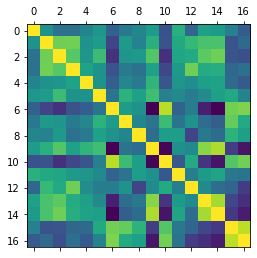

In [20]:
#heatmap (colored)
plt.matshow(wdi.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

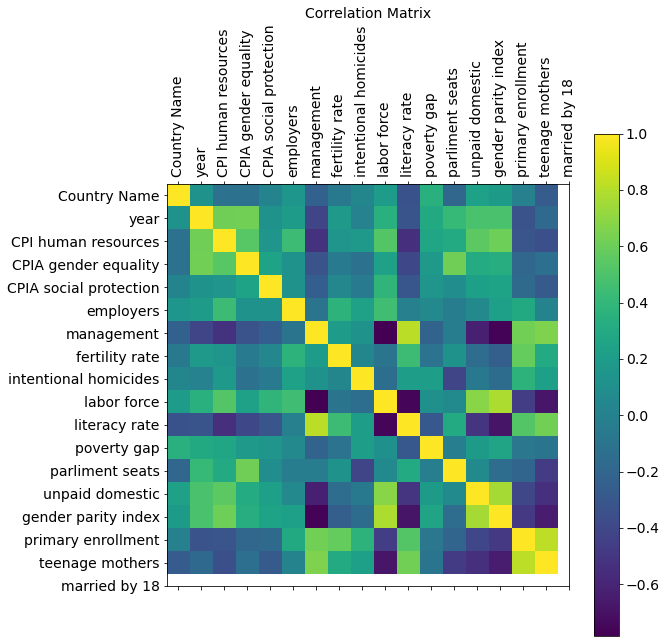

In [21]:
# Add labels, a legend, and change the size of the heatmap
f = plt.figure(figsize=(9, 9)) # figure size 
plt.matshow(wdi.corr(), fignum=f.number) # type of plot
plt.xticks(range(wdi.shape[1]), wdi.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(wdi.shape[1]), wdi.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [22]:
#heatmap with seaborn
sub = wdi[['CPI human resources', 'CPIA gender equality','CPIA social protection', 'employers', 'management', 
           'fertility rate','intentional homicides', 'labor force', 'literacy rate', 'poverty gap',
           'primary enrollment', 'parliment seats', 'unpaid domestic', 'gender parity index', 'teenage mothers',
           'married by 18']]

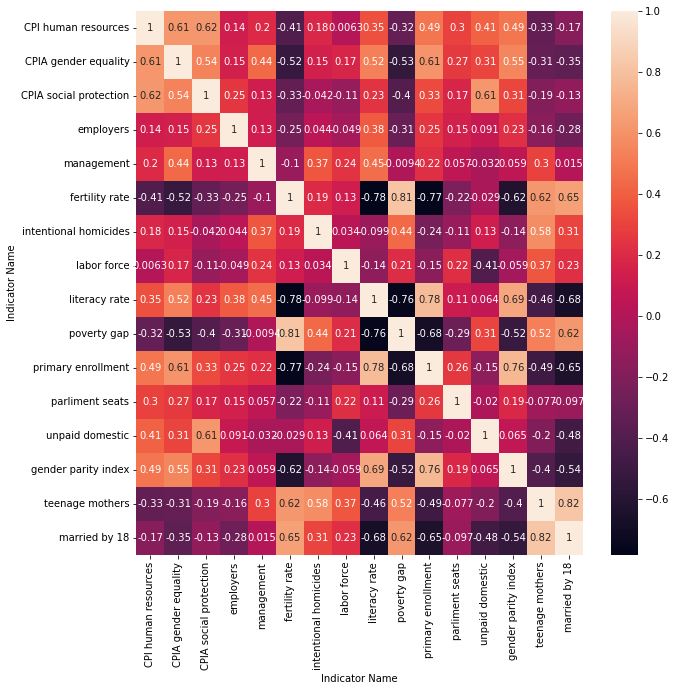

In [23]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 
#The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

In [24]:
#question 3
#as a correlation becomes more negative (towards -1) the stronger the negative relationship between the variables,
#so as one increases, the other decreases
#as a correlation becomes more positive (towards 1) the strong the positive relationship between the variables,
#so as one increases, the other increases as well

#strong negative relationships
#literacy rate and fertility rate x
#primary enrollment and fertility rate
#poverty gap and literacy rate

#strong positive relationships
#married by 18 and teenage mothers x
#poverty gap and fertility rate
#primary enrollment and literacy rate 
#gender parity index and primary enrollment

## Scatter Plots

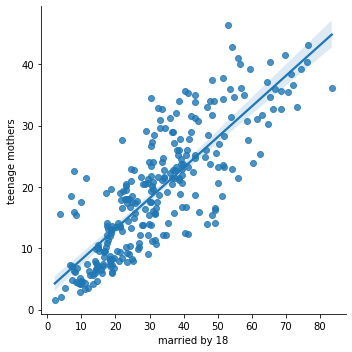

In [25]:
#scatter plot for the strongest positive relationship, married by 18 and teenage mothers
sns.lmplot(x = 'married by 18', y = 'teenage mothers', data = wdi)

In [26]:
#the scatterplot definitely shows a strong relationship, the two variables follow the line extremely well

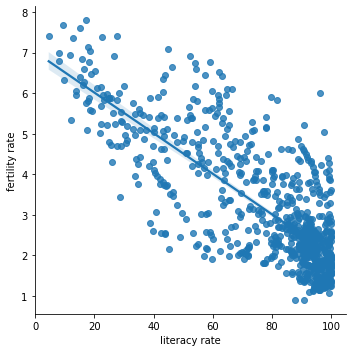

In [27]:
#scatter plot for the strongest negative relationship, literacy rate and fertility rate
sns.lmplot(x = 'literacy rate', y = 'fertility rate', data = wdi)

In [28]:
#there is very strong relationship between the two

## Pair Plot

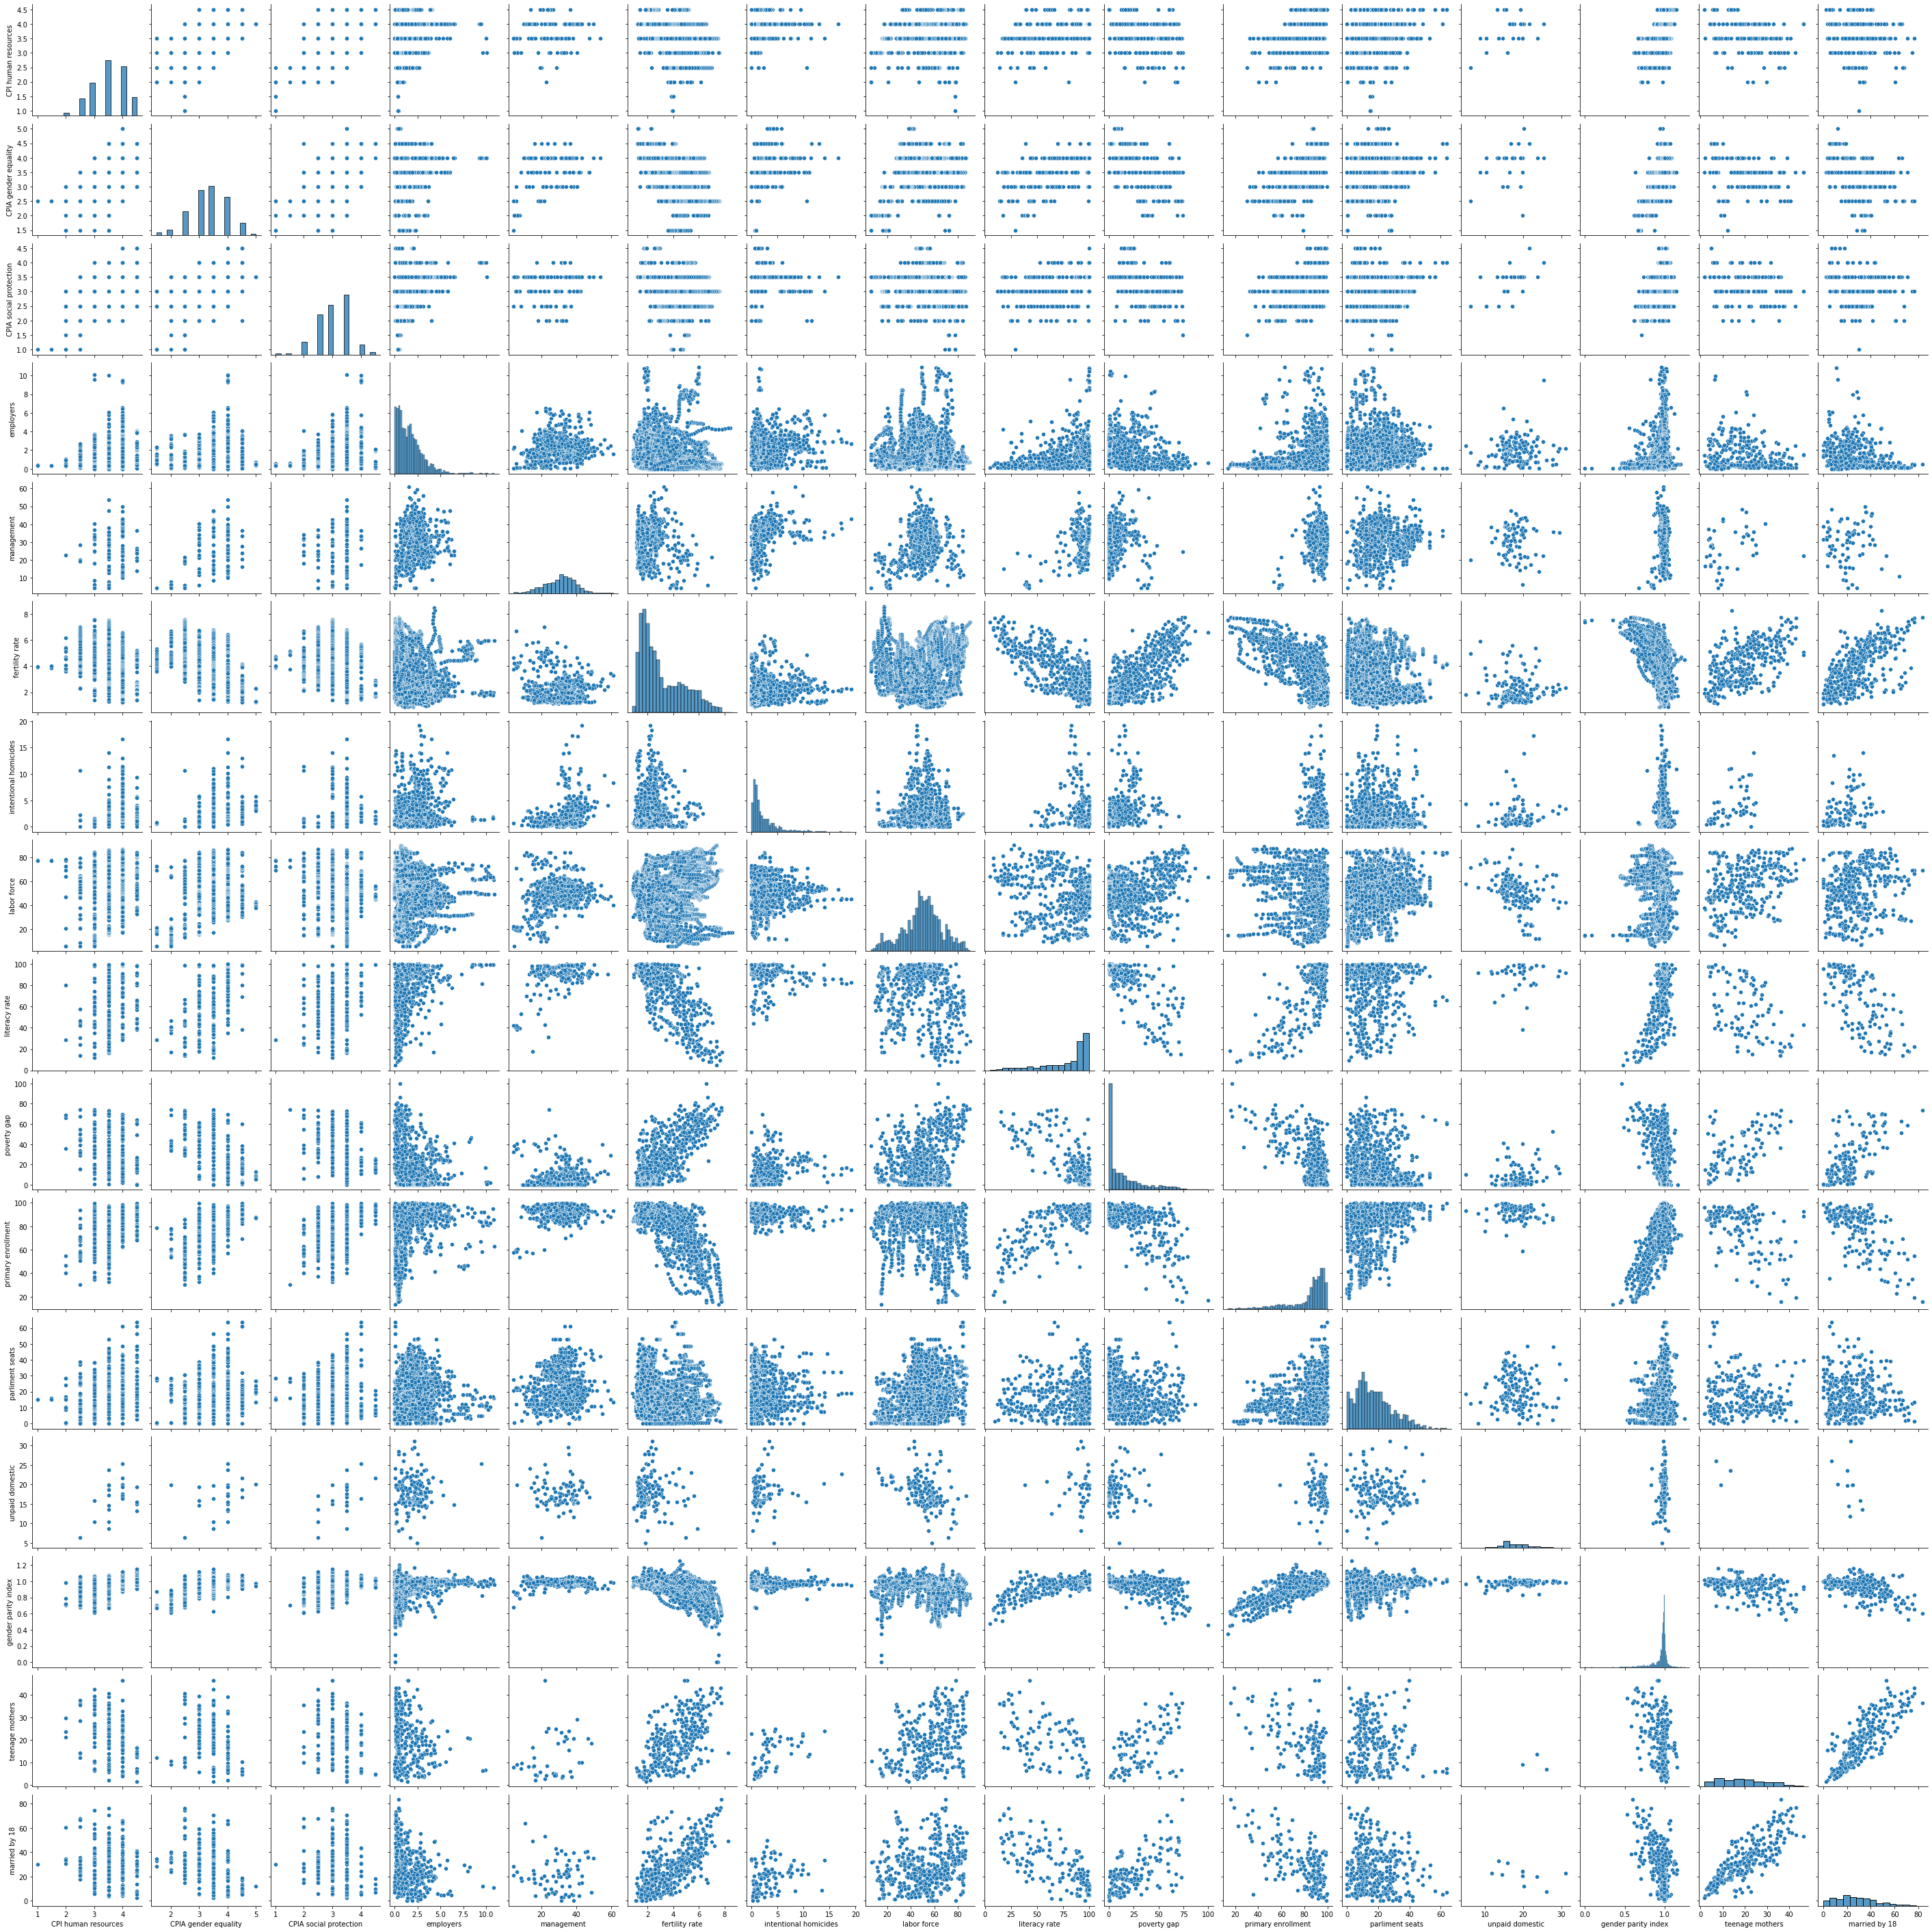

In [29]:
#pair plot without country or year
pair = sns.pairplot(sub)

In [30]:
#the variables i'd like to look into (correlated based on labor force percentage):
#management, poverty gap, unpaid domestic, teenage mothers, fertility rate, literacy rate 
#i chose these ones cause i can kinda plot a bit of a linear or higher level (x^2) lines within the graphs

# Categorical Graph

<AxesSubplot:xlabel='labor force', ylabel='Count'>

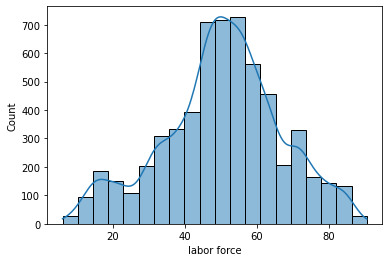

In [31]:
#create a histogram for labor force so i can create categories
sns.histplot(wdi['labor force'], bins = 20, kde = True)

In [32]:
wdi.loc[wdi['labor force']<40, 'labor category'] = 'low labor'

In [33]:
wdi.loc[(wdi['labor force']>40) & (wdi['labor force']<70), 'labor category'] = 'middle labor'

In [34]:
wdi.loc[wdi['labor force']>70, 'labor category'] = 'high labor'

In [35]:
wdi['labor category'].value_counts()

middle labor    3807
low labor       1427
high labor       750
Name: labor category, dtype: int64

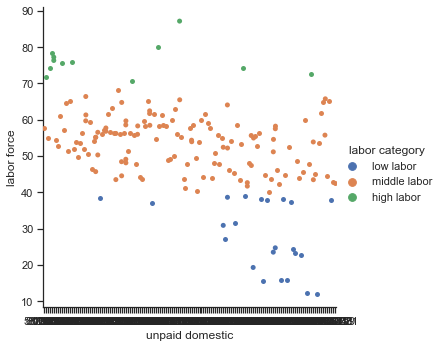

In [36]:
#create a cat graph with the above categories
sns.set(style='ticks')
g = sns.catplot(x='unpaid domestic', y='labor force', hue='labor category', data=wdi)

In [37]:
#women that do less labor tend to do more unpaid domestic and care work, women that do the highest amout of labor
#tend to do less unpaid domestic and care work, women in the middle go from no labor to all labor

## Profile Report

In [38]:
#created a profile report
prof = pp.ProfileReport(wdi)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [39]:
#according to the profile report the labor force has high correlation with CPIA gender equality, management,
#fertility rate, literacy rate, poverty gap, unpaid domestic, primary enrollment, and teenage mothers

# Questions

In [40]:
#My questions from last exercises were as follows: 
#Does poverty increase the percent of women working? 
###women might work more when there is a high poverty gap
#Does education have an effect on the percent of women working? 
###literacy and primary completion have a negative effect
#Does getting married or having children early decrease the percent of women working? 
###being married and having children has a pos relationship with labor force
#Does having more women in higher positions have an effect on the percent of women working? 
###having women in parliament and middle to top management has a positive relationship

In [41]:
#some hypotheses
##mothers work more
##some regions have different levels of female labor
##having more women in positions of power leads to more women in the labor force